# Лабораторная работа 1


## Задание 1

Рассчитайте характеристики:

- Среднее
- Дисперсия
- Мода
- Медиана
- Квантили уровня 0.25, 0.5, 0.75
- Эксцесс
- Ассиметрия
- Интерквартильный размах

Построить графики:
- Гистограмма
- Эмпирическая функция распределения

In [837]:
N = 6
cols = ['Daily_Usage_Hours', 'Sleep_Hours', 'Exercise_Hours', 'Screen_Time_Before_Bed', 'Time_on_Social_Media', 'Time_on_Gaming', 'Time_on_Education']
col_name = cols[N % 7]

print(col_name)

Time_on_Education


In [838]:
import pandas as pd
import numpy as np

df = pd.read_csv("dataset.csv")

series = pd.to_numeric(df[col_name], errors="coerce").dropna().astype(float)

data = series.values

print("Размер:", len(data))
print("Первые 10 элементов:", data[:10])

Размер: 3000
Первые 10 элементов: [1.2 1.8 0.4 0.8 1.1 1.4 1.  0.5 1.3 1. ]


In [839]:
from scipy import stats

def get_statistic(data):
    mean = np.mean(data)
    variance = np.var(data)
    mode = stats.mode(data, keepdims=True).mode[0]
    median = np.median(data)

    q25, q50, q75 = np.percentile(data, [25, 50, 75])
    iqr = q75 - q25

    skew = stats.skew(data)
    excess = stats.kurtosis(data, fisher=True)

    print('Среднее', mean)
    print('Дисперсия', variance)
    print('Мода', mode)
    print('Медиана', median)

    print('q25', float(q25))
    print('q50', float(q50))
    print('q75', float(q75))
    print('iqr', float(iqr))

    print('Асиметрия', skew) 
    print('Эксцесс', excess)

get_statistic(data)

Среднее 1.0163333333333333
Дисперсия 0.42020655555555564
Мода 0.0
Медиана 1.0
q25 0.5
q50 1.0
q75 1.5
iqr 1.0
Асиметрия 0.34002789690434665
Эксцесс -0.39997284929065513


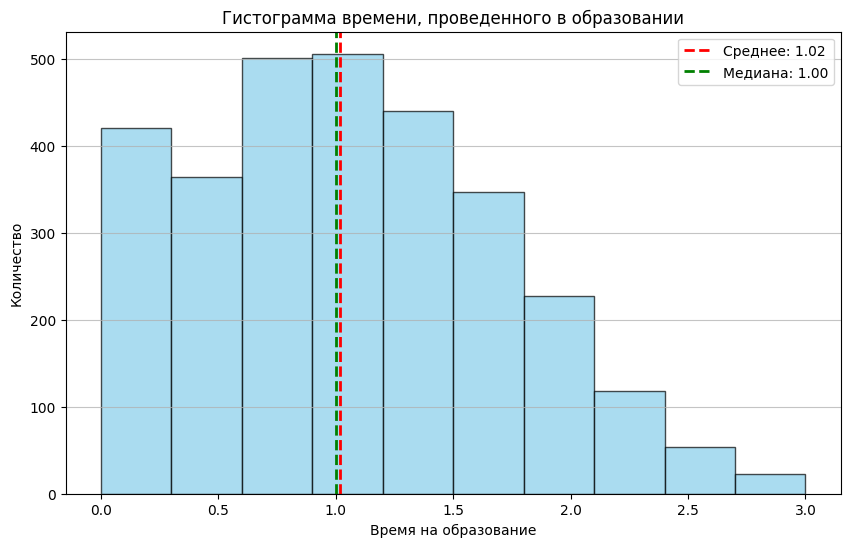

In [840]:
import matplotlib.pyplot as plt

def show_histogram(data):
    mean_value = np.mean(data)
    median_value = np.median(data)
    plt.figure(figsize=(10, 6))
    plt.hist(data, bins=10, color='skyblue', edgecolor='black', alpha=0.7)

    plt.axvline(mean_value, color='red', linestyle='dashed', linewidth=2, label=f'Среднее: {mean_value:.2f}')
    plt.axvline(median_value, color='green', linestyle='dashed', linewidth=2, label=f'Медиана: {median_value:.2f}')

    plt.title('Гистограмма времени, проведенного в образовании')
    plt.xlabel('Время на образование')
    plt.ylabel('Количество')
    plt.legend()
    plt.grid(axis='y', alpha=0.75)
    plt.show()

show_histogram(data)


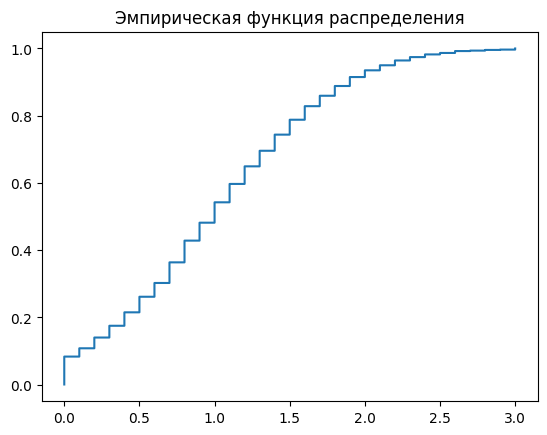

In [841]:
def show_ECDF(data):
    sorted_data = np.sort(data)
    y = np.arange(1, len(sorted_data)+1) / len(sorted_data)
    plt.step(sorted_data, y, where="post")
    plt.title("Эмпирическая функция распределения")
    plt.show()

show_ECDF(data)

### Вывод
- написаны функции для статистических данных
- написана функция для построения гистограммы
- написана функция для построения эмперической функции распределения

Распределение не является нормальным. Ассимметрия > 0, что свидетельствует о сдвиге влево. Правый хвост длиннее.

## Задание 2

Проверить данные на нормальность, используя критерии:

- Хи-квадрат (Реализовать самому, не используя библиотечные варианты!!)
- Ассиметрии и эксцесса

Построить Q-Q plot

In [842]:
import numpy as np
from scipy.stats import norm, chi2

def chi2_test(data, bins=20):
    data = np.asarray(data)
    n = len(data)

    observed, bin_edges = np.histogram(data, bins=bins)
    
    mu, sigma = np.mean(data), np.std(data, ddof=1)
    
    expected_probs = []
    for i in range(len(bin_edges) - 1):
        p = norm.cdf(bin_edges[i+1], mu, sigma) - norm.cdf(bin_edges[i], mu, sigma)
        expected_probs.append(p)
    
    expected = np.array(expected_probs) * n
    
    obs_merged = []
    exp_merged = []
    
    i = 0
    while i < len(observed):
        current_obs = observed[i]
        current_exp = expected[i]
        
        j = i + 1
        while j < len(observed) and current_exp < 5:
            current_obs += observed[j]
            current_exp += expected[j]
            j += 1
        
        obs_merged.append(current_obs)
        exp_merged.append(current_exp)

        i = j

    chi2_stat = np.sum((np.array(obs_merged) - np.array(exp_merged)) ** 2 / np.array(exp_merged))
    
    df = len(obs_merged) - 1 - 2
    
    if df < 1:
        df = 1
    
    p_value = 1 - chi2.cdf(chi2_stat, df)
    
    alpha = 0.05
    if p_value < alpha:
        conclusion = "H0 отвергается: данные не распределены нормально"
    else:
        conclusion = "Нет оснований отвергать H0: данные могут быть нормально распределены"
    
    return chi2_stat, df, p_value, conclusion


chi2_stat, df, p_val, result = chi2_test(data, bins=10)
print(f"χ² = {chi2_stat:.4f}, df = {df}, p-value = {p_val:.4e}")
print("Вывод:", result)

χ² = 203.3140, df = 7, p-value = 0.0000e+00
Вывод: H0 отвергается: данные не распределены нормально


In [843]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

def check_skew_excess_criteria(data):
    n = len(data)

    standart_error_skew = (6.0 / n)**0.5
    standart_error_kurt = (24.0 / n)**0.5

    skew = stats.skew(data)
    excess = stats.kurtosis(data, fisher=True)

    z_skew = skew / standart_error_skew
    z_kurt = excess / standart_error_kurt

    p_skew = 2 * (1 - stats.norm.cdf(abs(z_skew)))
    p_kurt = 2 * (1 - stats.norm.cdf(abs(z_kurt)))

    alpha = 0.05
    print(f"n = {n}")
    print(f"Skew = {skew:.8f}, SE_skew = {standart_error_skew:.8f}, z_skew = {z_skew:.4f}, p_skew = {p_skew:.4e}")
    print(f"Excess = {excess:.8f}, SE_kurt = {standart_error_kurt:.8f}, z_kurt = {z_kurt:.4f}, p_kurt = {p_kurt:.4e}")
    print()

    if p_skew < alpha:
        print("Ассиметрия: H0 отвергается (асимметрия значима)")
    else:
        print("Ассиметрия: H0 не отвергается")

    if p_kurt < alpha:
        print("Эксцесс: H0 отвергается (эксцесс значим)")
    else:
        print("Эксцесс: H0 не отвергается")

check_skew_excess_criteria(data)


n = 3000
Skew = 0.34002790, SE_skew = 0.04472136, z_skew = 7.6033, p_skew = 2.8866e-14
Excess = -0.39997285, SE_kurt = 0.08944272, z_kurt = -4.4718, p_kurt = 7.7552e-06

Ассиметрия: H0 отвергается (асимметрия значима)
Эксцесс: H0 отвергается (эксцесс значим)


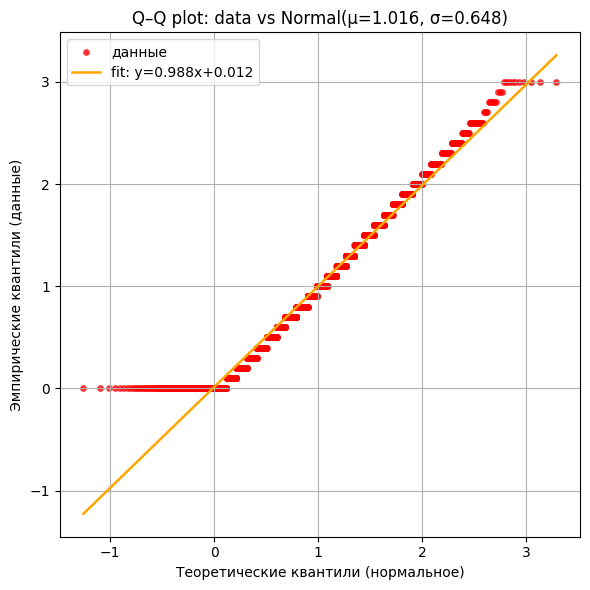

In [844]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

def build_QQ_plot(data):
    mu = np.mean(data)
    sigma = np.std(data, ddof=1)

    (osm, osr), (slope, intercept, r) = stats.probplot(data, dist="norm", sparams=(mu, sigma), plot=None)

    plt.figure(figsize=(6,6))
    plt.scatter(osm, osr, s=20, alpha=0.8, linewidth=0.3, facecolor="red", label="данные")
    x_line = np.array([np.min(osm), np.max(osm)])
    y_line = slope * x_line + intercept
    plt.plot(x_line, y_line, color="orange", lw=1.8, label=f'fit: y={slope:.3f}x+{intercept:.3f}')

    plt.title(f"Q–Q plot: data vs Normal(μ={mu:.3f}, σ={sigma:.3f})")
    plt.xlabel("Теоретические квантили (нормальное)")
    plt.ylabel("Эмпирические квантили (данные)")
    plt.legend()
    plt.grid()
    plt.tight_layout()
    plt.show()

build_QQ_plot(data)

### Вывод

- написана функция для проведения chi теста
- написана функция для теста на ассимметричность и эксцесс
- написана функция для QQ plot

Распределение не является нормальным.

# Задание 3

Используя техники обработки данных, постарайтесь привести данные к нормальному распределению. Например, с помощью:

- Удаление, усечение выбросов
- Стандартизация, нормировка
- Логарифмирование и т.п.

Выполните пункты I и II для обработанных данных

In [845]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

def show_plots(data, title_prefix="Данные"):
    """
    Строит три графика в ряд:
    """
    data = np.asarray(data, dtype=float)
    mean_value = np.mean(data)
    median_value = np.median(data)
    sigma = np.std(data, ddof=1)
    mu = mean_value

    fig, axes = plt.subplots(1, 3, figsize=(18, 5))

    axes[0].hist(data, bins=10, color='skyblue', edgecolor='black', alpha=0.7)
    axes[0].axvline(mean_value, color='red', linestyle='dashed', linewidth=2, label=f'Среднее: {mean_value:.2f}')
    axes[0].axvline(median_value, color='green', linestyle='dashed', linewidth=2, label=f'Медиана: {median_value:.2f}')
    axes[0].set_title(f'{title_prefix}: Гистограмма')
    axes[0].set_xlabel('Значения')
    axes[0].set_ylabel('Количество')
    axes[0].legend()
    axes[0].grid(axis='y', alpha=0.75)

    sorted_data = np.sort(data)
    y = np.arange(1, len(sorted_data)+1) / len(sorted_data)
    axes[1].step(sorted_data, y, where="post")
    axes[1].set_title(f'{title_prefix}: ECDF')
    axes[1].set_xlabel('Значения')
    axes[1].set_ylabel('Эмпирическая вероятность')
    axes[1].grid(alpha=0.5)

    (osm, osr), (slope, intercept, r) = stats.probplot(data, dist="norm", sparams=(mu, sigma), plot=None)
    axes[2].scatter(osm, osr, s=20, alpha=0.8, linewidth=0.3, facecolor="red", label="данные")
    x_line = np.array([np.min(osm), np.max(osm)])
    y_line = slope * x_line + intercept
    axes[2].plot(x_line, y_line, color="orange", lw=1.8, label=f'fit: y={slope:.3f}x+{intercept:.3f}')
    axes[2].set_title(f'{title_prefix}: Q–Q plot')
    axes[2].set_xlabel("Теоретические квантили")
    axes[2].set_ylabel("Эмпирические квантили")
    axes[2].legend()
    axes[2].grid(alpha=0.5)

    plt.tight_layout()
    plt.show()


In [846]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler

data_clean = data.copy()

def trim_data(data):
    q25, q75 = np.percentile(data, [25, 75])
    iqr = q75 - q25
    lower = q25 - 1.5*iqr
    upper = q75 + 1.5*iqr
    data_trimmed = data[(data >= lower) & (data <= upper)]

    print(f"Исходно: {len(data_clean)} элементов")
    print(f"После усечения: {len(data_trimmed)} элементов")
    print(f"Удалено выбросов: {len(data_clean) - len(data_trimmed)}")
    print(f"Q25={q25:.4f}, Q75={q75:.4f}, IQR={iqr:.4f}")

    return data_trimmed

def trim_by_bins(data, bins=20, min_count=5):

    data = np.asarray(data)
    counts, edges = np.histogram(data, bins=bins)
    mask = np.zeros_like(data, dtype=bool)

    for i in range(len(edges) - 1):
        in_bin = (data >= edges[i]) & (data < edges[i+1])
        if counts[i] >= min_count:
            mask |= in_bin

    return data[mask]

## IQR - клипы

Вывод: будет хорошо работать при выбросах, можно совместить с другими

Исходно: 3000 элементов
После усечения: 3000 элементов
Удалено выбросов: 0
Границы: lower = -1.0000, upper = 3.0000
Q25=0.5000, Q75=1.5000, IQR=1.0000


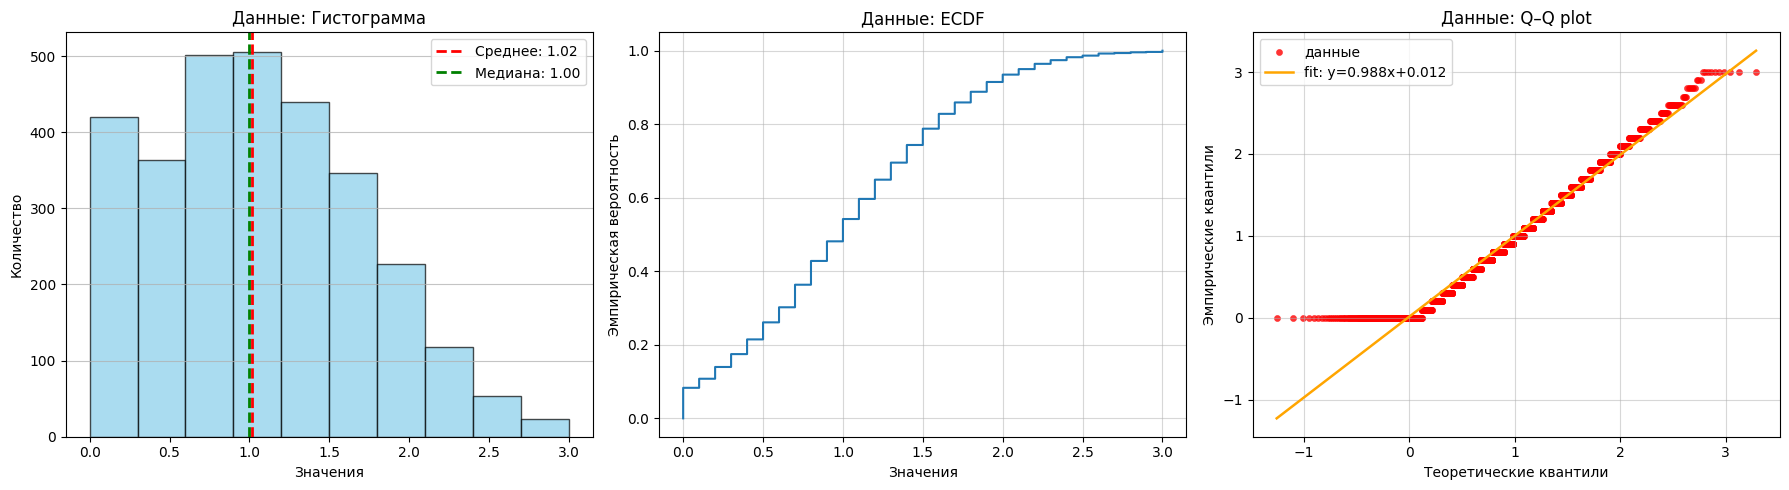

χ² = 203.3140, df = 7, p-value = 0.0000e+00
Вывод: H0 отвергается: данные не распределены нормально
n = 3000
Skew = 0.34002790, SE_skew = 0.04472136, z_skew = 7.6033, p_skew = 2.8866e-14
Excess = -0.39997285, SE_kurt = 0.08944272, z_kurt = -4.4718, p_kurt = 7.7552e-06

Ассиметрия: H0 отвергается (асимметрия значима)
Эксцесс: H0 отвергается (эксцесс значим)


In [847]:
from scipy.stats import rankdata, norm

def iqr_clip(data):
    q25, q75 = np.percentile(data, [25, 75]) 
    iqr = q75 - q25 
    lower_bound = q25 - 1.5 * iqr 
    upper_bound = q75 + 1.5 * iqr 
    data_trimmed = data[(data >= lower_bound) & (data <= upper_bound)] 
    
    print(f"Исходно: {len(data)} элементов") 
    print(f"После усечения: {len(data_trimmed)} элементов") 
    print(f"Удалено выбросов: {len(data) - len(data_trimmed)}") 
    print(f"Границы: lower = {lower_bound:.4f}, upper = {upper_bound:.4f}") 
    print(f"Q25={q25:.4f}, Q75={q75:.4f}, IQR={iqr:.4f}")

    return data_trimmed

iqr_modified_data = iqr_clip(data)

show_plots(iqr_modified_data)

chi2_stat, df, p_val, result = chi2_test(iqr_modified_data, bins=10)
print(f"χ² = {chi2_stat:.4f}, df = {df}, p-value = {p_val:.4e}")
print("Вывод:", result)
check_skew_excess_criteria(iqr_modified_data)

## Rank-based inverse normal transformation (RINT)

Сортируем данные по рангу и преобразуем к нормальному распределению через квантиль нормали.

Вывод: в данном случае метод помог улучшить асиметрию

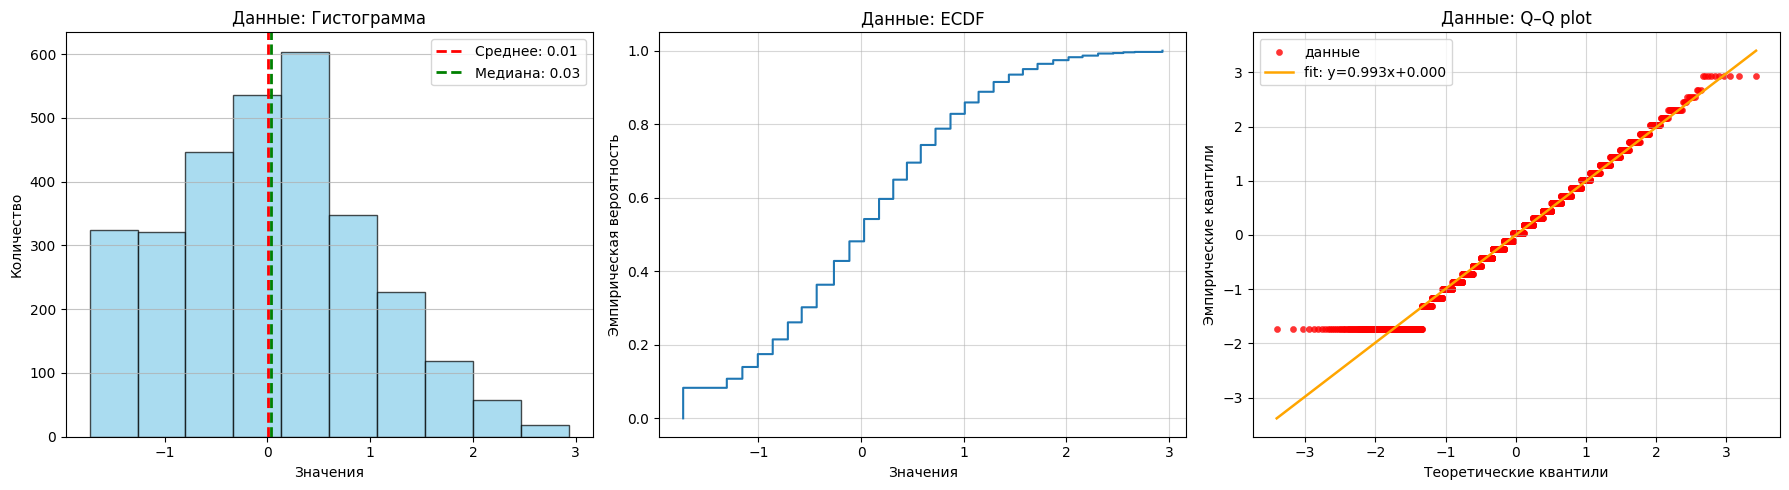

χ² = 153.3149, df = 7, p-value = 0.0000e+00
Вывод: H0 отвергается: данные не распределены нормально
n = 3000
Skew = 0.14120127, SE_skew = 0.04472136, z_skew = 3.1574, p_skew = 1.5921e-03
Excess = -0.34464910, SE_kurt = 0.08944272, z_kurt = -3.8533, p_kurt = 1.1654e-04

Ассиметрия: H0 отвергается (асимметрия значима)
Эксцесс: H0 отвергается (эксцесс значим)


In [848]:
ranks = rankdata(data)
rint_data = norm.ppf((ranks - 0.5) / len(ranks))

show_plots(rint_data)

chi2_stat, df, p_val, result = chi2_test(rint_data, bins=10)
print(f"χ² = {chi2_stat:.4f}, df = {df}, p-value = {p_val:.4e}")
print("Вывод:", result)
check_skew_excess_criteria(rint_data)

## Логарифмировать
Вывод: на этих данных не помог

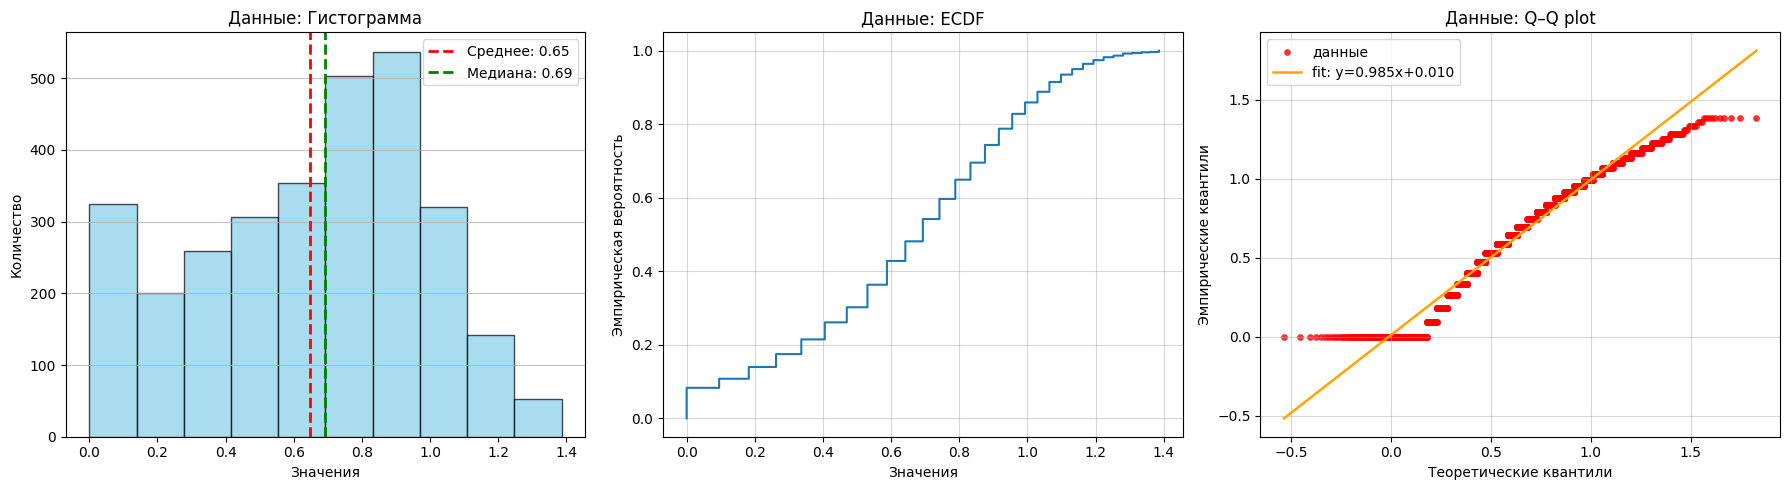

χ² = 574.2067, df = 7, p-value = 0.0000e+00
Вывод: H0 отвергается: данные не распределены нормально
n = 3000
Skew = -0.31880687, SE_skew = 0.04472136, z_skew = -7.1287, p_skew = 1.0130e-12
Excess = -0.65164858, SE_kurt = 0.08944272, z_kurt = -7.2857, p_kurt = 3.2019e-13

Ассиметрия: H0 отвергается (асимметрия значима)
Эксцесс: H0 отвергается (эксцесс значим)


In [849]:
def log_transform(data):
    x = np.asarray(data)
    x = x[x > -1]
    transformed = np.log1p(x)
    return transformed

data_log = log_transform(data[data >= 0])

show_plots(data_log)

chi2_stat, df, p_val, result = chi2_test(data_log, bins=10)
print(f"χ² = {chi2_stat:.4f}, df = {df}, p-value = {p_val:.4e}")
print("Вывод:", result)
check_skew_excess_criteria(data_log)


## BoxCox
Степенное преобразование, которое применяется к положительным значениям

Вывод: улучшилась асиметрия, распределение стало более близко к нормальному

Box-Cox λ = 0.5960987267316897


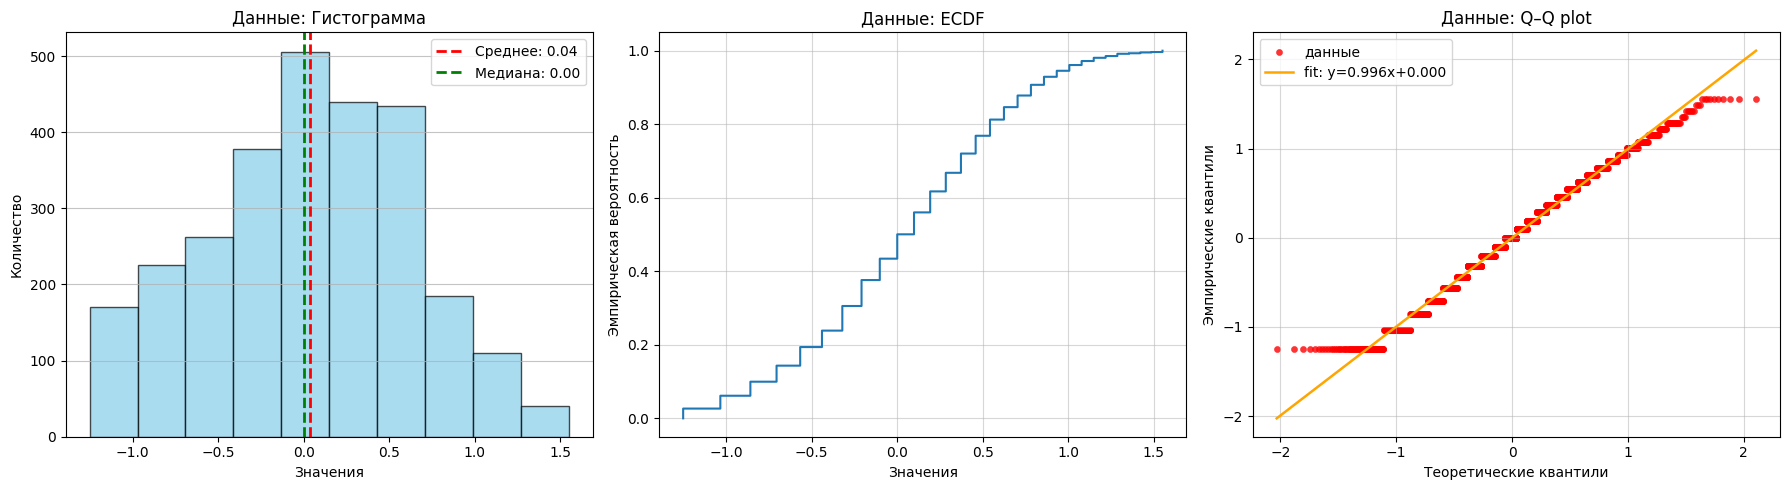

χ² = 154.8617, df = 7, p-value = 0.0000e+00
Вывод: H0 отвергается: данные не распределены нормально
n = 2750
Skew = -0.08491084, SE_skew = 0.04670994, z_skew = -1.8178, p_skew = 6.9090e-02
Excess = -0.48227958, SE_kurt = 0.09341987, z_kurt = -5.1625, p_kurt = 2.4368e-07

Ассиметрия: H0 не отвергается
Эксцесс: H0 отвергается (эксцесс значим)


In [850]:
from scipy import stats
import numpy as np

def boxcox_transform(data):
    x = np.asarray(data, dtype=float)
    x = x[~np.isnan(x)]
    x = x[x > 0]
    
    transformed, lam = stats.boxcox(x)
    return transformed, lam

data_bc, lam = boxcox_transform(data)
print("Box-Cox λ =", lam)

show_plots(data_bc)

chi2_stat, df, p_val, result = chi2_test(data_bc, bins=10)
print(f"χ² = {chi2_stat:.4f}, df = {df}, p-value = {p_val:.4e}")
print("Вывод:", result)
check_skew_excess_criteria(data_bc)


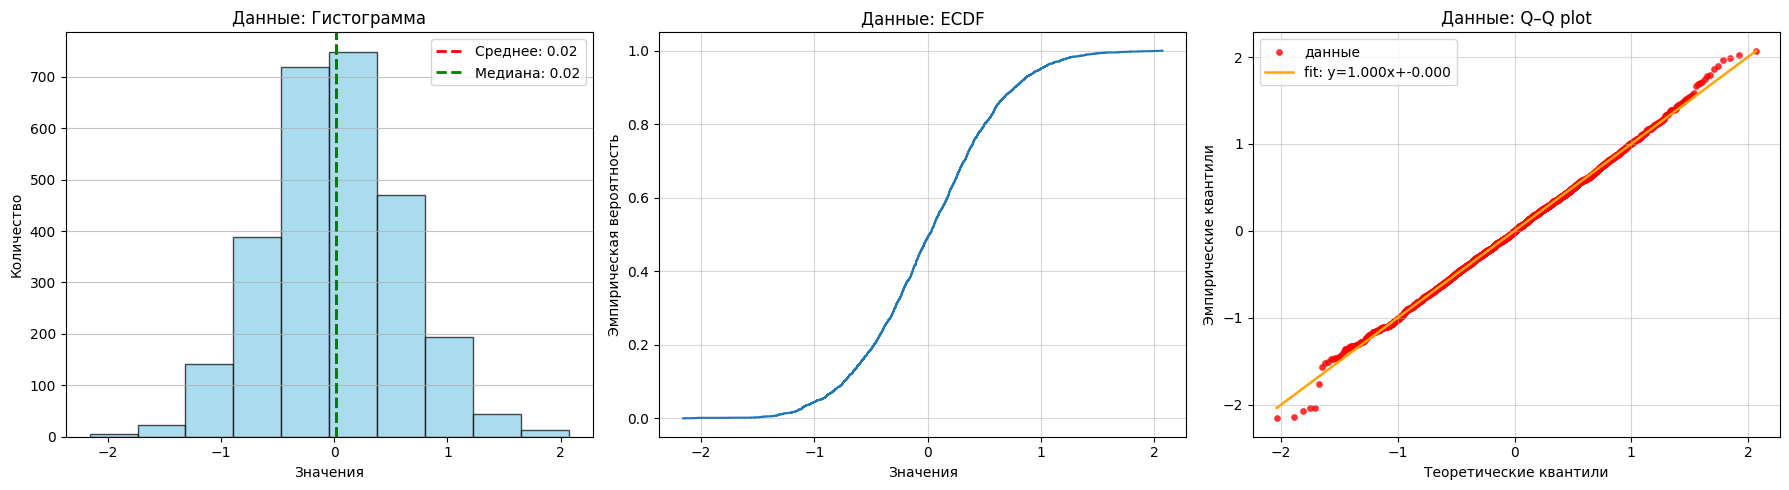

χ² = 7.3886, df = 6, p-value = 2.8639e-01
Вывод: Нет оснований отвергать H0: данные могут быть нормально распределены
n = 2750
Skew = 0.03552791, SE_skew = 0.04670994, z_skew = 0.7606, p_skew = 4.4689e-01
Excess = 0.13727838, SE_kurt = 0.09341987, z_kurt = 1.4695, p_kurt = 1.4170e-01

Ассиметрия: H0 не отвергается
Эксцесс: H0 не отвергается


In [851]:
from scipy.stats import johnsonsu
gamma, delta, xi, lam = johnsonsu.fit(data_bc)
data_bc_johnsonsu = johnsonsu(gamma, delta, loc=xi, scale=lam).rvs(len(data_bc))

show_plots(data_bc_johnsonsu)

chi2_stat, df, p_val, result = chi2_test(data_bc_johnsonsu, bins=10)
print(f"χ² = {chi2_stat:.4f}, df = {df}, p-value = {p_val:.4e}")
print("Вывод:", result)
check_skew_excess_criteria(data_bc_johnsonsu)

### Вывод
- проведено несколько тестов и выведено их описание и краткий итог
- лучше всего отработало на BoxCox
- попробовала улучшить через johnsonsu

Идеального нормального распределение добиться не удалось. Гипотеза подтвердилась только при использовании johnsonsu, но изучила, что такой метод не является хорошим решением.

После BoxCox значительно улучшилась ассимметричность.

## Задание 4

Сгруппируйте данные по столбцу 'School_Grade'.

На одном графике постройте гистограммы для каждой группы.
Рассчитайте среднее, дисперсию внутри каждой группы

GRADE  10th
Среднее 1.028542094455852
Дисперсия 0.4477890449426359
Мода 0.0
Медиана 1.0
q25 0.5
q50 1.0
q75 1.5
iqr 1.0
Асиметрия 0.4746093213221219
Эксцесс -0.1640331890807336
------------------------------
GRADE  11th
Среднее 0.9916492693110647
Дисперсия 0.4090325617479003
Мода 0.0
Медиана 1.0
q25 0.5
q50 1.0
q75 1.4
iqr 0.8999999999999999
Асиметрия 0.31312648416308614
Эксцесс -0.4968586985049219
------------------------------
GRADE  12th
Среднее 1.024007561436673
Дисперсия 0.3995559621356414
Мода 0.8
Медиана 1.0
q25 0.6
q50 1.0
q75 1.5
iqr 0.9
Асиметрия 0.40816343237361363
Эксцесс -0.18457491253164715
------------------------------
GRADE  7th
Среднее 1.021327967806841
Дисперсия 0.4175330453546227
Мода 0.0
Медиана 1.0
q25 0.5
q50 1.0
q75 1.5
iqr 1.0
Асиметрия 0.2163015586583181
Эксцесс -0.5908687418771543
------------------------------
GRADE  8th
Среднее 0.9753112033195022
Дисперсия 0.42297967493672634
Мода 0.0
Медиана 0.9
q25 0.5
q50 0.9
q75 1.4
iqr 0.8999999999999999
Асиметрия 0.29

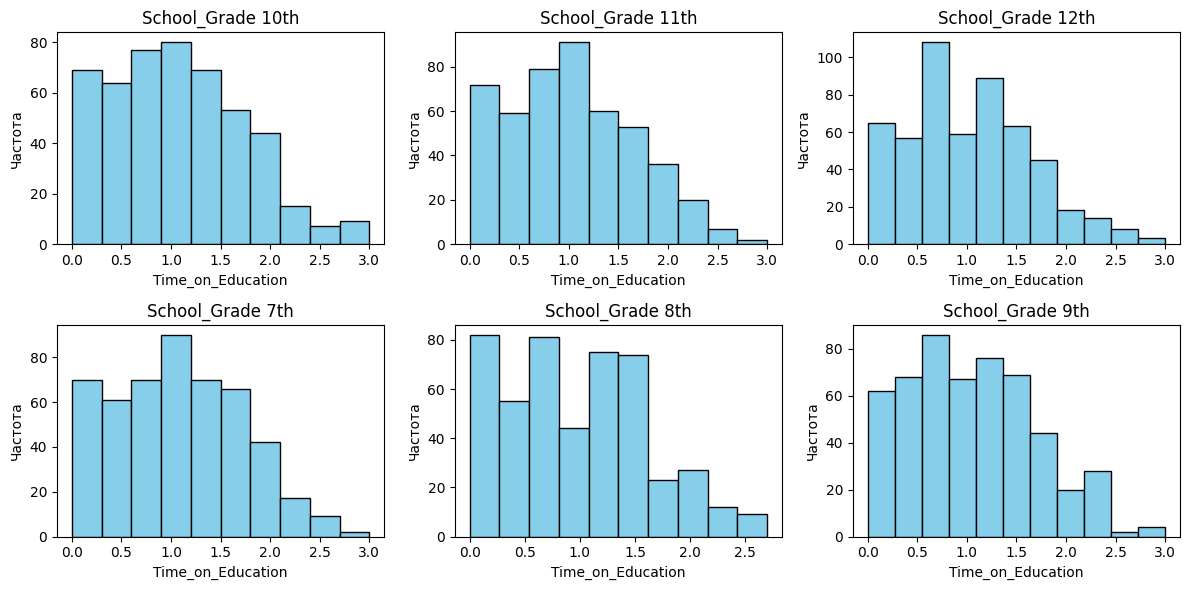

In [854]:
import matplotlib.pyplot as plt

df = pd.read_csv("dataset.csv")

groups = df[['School_Grade', col_name]].groupby('School_Grade')[col_name]
group_names = groups.groups.keys()
n_groups = len(group_names)

ncols = 3
nrows = (n_groups + ncols - 1) // ncols

fig, axes = plt.subplots(nrows, ncols, figsize=(ncols*4, nrows*3))
axes = axes.flatten()

for i, (name, g) in enumerate(groups):
    axes[i].hist(g.values, bins='sturges', color='skyblue', edgecolor='black')
    axes[i].set_title(f"School_Grade {name}")
    axes[i].set_xlabel(col_name)
    axes[i].set_ylabel('Частота')

    print("GRADE ", name)
    get_statistic(g.values)
    print("-"*30)

for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()
